In [120]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pandas as pd
import os
from catboost import CatBoostRegressor

In [121]:
df_2022 = pd.read_csv('df_2022.csv')
df_2022.drop(columns=['Unnamed: 0'], inplace=True)
df_2022

,thermo_min,thermo_max,thermo_mean,thermo_stDev,Field_BaseName,thermal_integral,ndsi_min,ndsi_max,ndsi_mean,ndsi_stDev,...,Crop type,Variety,Reproduction,Sown Area,Previous Crop,Primary Tillage Method,Seeder Brand,Harvested Area,Crop prod,year
0,-5.326639,3.805920,-0.901350,1.646105,101,-250.643599,-0.285538,0.068926,-0.102679,0.042749,...,ОЗ. ПШЕНИЦА,Таня,ЭС,102.0,ПОДСОЛНЕЧНИК,дискование,СЗ-54,102.0,79.275490,2022
1,-7.004691,2.599944,-2.353663,2.003238,102,-647.036592,-0.280469,0.091776,-0.110388,0.043006,...,ОЗ. ПШЕНИЦА,Юка,ЭС,90.0,САХ. СВЕКЛА,дискование,Бурго,90.0,64.145556,2022
2,-9.139975,0.482432,-5.033321,2.029164,125,-1428.198077,-0.328495,0.146932,-0.104502,0.050457,...,ОЗ. ПШЕНИЦА,Ахмат(опыты),ЭС,108.0,КУКУРУЗА гибрид,дискование,СЗ-54,108.0,72.903704,2022
3,-11.922635,-0.620905,-6.602255,2.359277,131,-1884.861240,-0.300533,0.141743,-0.112232,0.044134,...,ОЗ. ПШЕНИЦА,Шарм,ОС,6.0,СОЯ сем.,дискование,СЗ-54,6.0,67.216667,2022
4,-11.175456,0.007622,-5.940963,2.296216,132,-1683.420525,-0.325661,0.128526,-0.113325,0.045993,...,ОЗ. ПШЕНИЦА,Таня,ЭС,96.0,ПОДСОЛНЕЧНИК КОНД.,дискование,СЗ-54,96.0,66.618750,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,-6.747755,3.932579,-1.378813,2.080271,9229,-393.630227,-0.304730,0.089463,-0.093494,0.047987,...,ОЗ. ПШЕНИЦА,Таня,ЭС,116.0,ПОДСОЛНЕЧНИК,дискование,СЗ-54,116.0,66.125862,2022
267,-8.022186,3.997817,-1.066971,2.390707,9232,-303.551024,-0.310490,0.113326,-0.099148,0.054815,...,ОЗ. ПШЕНИЦА,Таня,ЭС,91.0,ПОДСОЛНЕЧНИК,дискование,Бурго,91.0,59.382418,2022
268,-8.407739,4.413840,-2.365105,2.705117,9235,-664.811597,-0.300224,0.132096,-0.085930,0.056217,...,ОЗ. ПШЕНИЦА,Стиль 18,ОС,15.0,СОЯ,дискование,СЗ-54,15.0,81.400000,2022
269,-7.210360,3.209426,-2.331099,2.204739,9236,-647.159639,-0.306692,0.106545,-0.082058,0.050844,...,ОЗ. ПШЕНИЦА,Таня,ЭС,57.0,ПОДСОЛНЕЧНИК,дискование,СЗ-54,57.0,70.621053,2022


In [122]:
df_2024 = pd.read_csv('df_2024.csv')
df_2024.drop(columns=['Unnamed: 0'], inplace=True)
df_2024

,thermo_min,thermo_max,thermo_mean,thermo_stDev,Field_BaseName,thermal_integral,ndsi_min,ndsi_max,ndsi_mean,ndsi_stDev,...,Department No.,Crop type,Variety,Reproduction,Sown Area,Previous Crop,Seeder Brand,Harvested Area,Crop prod,year
0,-5.326639,3.805920,-0.901350,1.646105,101,-250.643599,-0.285538,0.068926,-0.102679,0.042749,...,1,ОЗ.ПШЕНИЦА,Монэ,ЭС,102.0,ОЗ.РАПС,HORSCH,84.0,80.748810,2024
1,-7.004691,2.599944,-2.353663,2.003238,102,-647.036592,-0.280469,0.091776,-0.110388,0.043006,...,1,ОЗ.ПШЕНИЦА,Бумба,ЭС,90.0,ПОДСОЛНЕЧНИК,HORSCH,90.0,74.804444,2024
2,-5.945690,3.958461,-1.050637,1.934210,111,-234.084168,-0.259057,0.074881,-0.094138,0.043723,...,1,ОЗ.ПШЕНИЦА,Монэ,ЭС,96.0,ПОДСОЛНЕЧНИК,HORSCH,96.0,89.211458,2024
3,-7.953142,1.430006,-3.294684,2.021073,120,-871.168479,-0.318730,0.186380,-0.126131,0.061896,...,1,ОЗ.ПШЕНИЦА,Гурт,ЭС,73.0,СОЯ,СЗ-5.4,73.0,79.206849,2024
4,-9.139975,0.482432,-5.033321,2.029164,125,-1428.198077,-0.328495,0.146932,-0.104502,0.050457,...,1,ОЗ.ПШЕНИЦА,Таня,ЭС,108.0,КУК/ГИБРИДНАЯ,HORSCH,108.0,87.583333,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-6.747755,3.932579,-1.378813,2.080271,9229,-393.630227,-0.304730,0.089463,-0.093494,0.047987,...,9,ОЗ.ПШЕНИЦА,Школа,ЭС,116.0,ОЗ.РАПС,Бурго,116.0,76.313793,2024
252,-8.022186,3.997817,-1.066971,2.390707,9232,-303.551024,-0.310490,0.113326,-0.099148,0.054815,...,9,ОЗ.ПШЕНИЦА,Таня,ЭС,91.0,КУК/ЗЕРНО,Бурго,91.0,72.690110,2024
253,-8.407739,4.413840,-2.365105,2.705117,9235,-664.811597,-0.300224,0.132096,-0.085930,0.056217,...,9,ОЗ.ПШЕНИЦА,Юка,ЭС,75.0,САХ. СВЕКЛА,HORSCH,75.0,70.712000,2024
254,-7.210360,3.209426,-2.331099,2.204739,9236,-647.159639,-0.306692,0.106545,-0.082058,0.050844,...,9,ОЗ.ПШЕНИЦА,Кольчуга,ЭС,57.0,СОЯ,Бурго,57.0,76.729825,2024


In [123]:
df = pd.concat([df_2022, df_2024], axis=0)
df

,thermo_min,thermo_max,thermo_mean,thermo_stDev,Field_BaseName,thermal_integral,ndsi_min,ndsi_max,ndsi_mean,ndsi_stDev,...,Crop type,Variety,Reproduction,Sown Area,Previous Crop,Primary Tillage Method,Seeder Brand,Harvested Area,Crop prod,year
0,-5.326639,3.805920,-0.901350,1.646105,101,-250.643599,-0.285538,0.068926,-0.102679,0.042749,...,ОЗ. ПШЕНИЦА,Таня,ЭС,102.0,ПОДСОЛНЕЧНИК,дискование,СЗ-54,102.0,79.275490,2022
1,-7.004691,2.599944,-2.353663,2.003238,102,-647.036592,-0.280469,0.091776,-0.110388,0.043006,...,ОЗ. ПШЕНИЦА,Юка,ЭС,90.0,САХ. СВЕКЛА,дискование,Бурго,90.0,64.145556,2022
2,-9.139975,0.482432,-5.033321,2.029164,125,-1428.198077,-0.328495,0.146932,-0.104502,0.050457,...,ОЗ. ПШЕНИЦА,Ахмат(опыты),ЭС,108.0,КУКУРУЗА гибрид,дискование,СЗ-54,108.0,72.903704,2022
3,-11.922635,-0.620905,-6.602255,2.359277,131,-1884.861240,-0.300533,0.141743,-0.112232,0.044134,...,ОЗ. ПШЕНИЦА,Шарм,ОС,6.0,СОЯ сем.,дискование,СЗ-54,6.0,67.216667,2022
4,-11.175456,0.007622,-5.940963,2.296216,132,-1683.420525,-0.325661,0.128526,-0.113325,0.045993,...,ОЗ. ПШЕНИЦА,Таня,ЭС,96.0,ПОДСОЛНЕЧНИК КОНД.,дискование,СЗ-54,96.0,66.618750,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-6.747755,3.932579,-1.378813,2.080271,9229,-393.630227,-0.304730,0.089463,-0.093494,0.047987,...,ОЗ.ПШЕНИЦА,Школа,ЭС,116.0,ОЗ.РАПС,NaN,Бурго,116.0,76.313793,2024
252,-8.022186,3.997817,-1.066971,2.390707,9232,-303.551024,-0.310490,0.113326,-0.099148,0.054815,...,ОЗ.ПШЕНИЦА,Таня,ЭС,91.0,КУК/ЗЕРНО,NaN,Бурго,91.0,72.690110,2024
253,-8.407739,4.413840,-2.365105,2.705117,9235,-664.811597,-0.300224,0.132096,-0.085930,0.056217,...,ОЗ.ПШЕНИЦА,Юка,ЭС,75.0,САХ. СВЕКЛА,NaN,HORSCH,75.0,70.712000,2024
254,-7.210360,3.209426,-2.331099,2.204739,9236,-647.159639,-0.306692,0.106545,-0.082058,0.050844,...,ОЗ.ПШЕНИЦА,Кольчуга,ЭС,57.0,СОЯ,NaN,Бурго,57.0,76.729825,2024


In [124]:
df.iloc[0:0+1]['Field_BaseName']

0    101
Name: Field_BaseName, dtype: int64

In [125]:
df.iloc[0:0+1]['year']

0    2022
Name: year, dtype: int64

In [126]:
df.iloc[100:100+1]['Field_BaseName']

100    1414
Name: Field_BaseName, dtype: int64

In [127]:
df.iloc[100:100+1]['year']

100    2022
Name: year, dtype: int64

In [128]:
df.iloc[250:250+1]['Field_BaseName']

250    9119
Name: Field_BaseName, dtype: int64

In [129]:
df.iloc[250:250+1]['year']

250    2022
Name: year, dtype: int64

In [130]:
df.iloc[500:500+1]['Field_BaseName']

229    2330
Name: Field_BaseName, dtype: int64

In [131]:
df.iloc[500:500+1]['year']

229    2024
Name: year, dtype: int64

In [132]:
df.iloc[0:0+1]['Field_BaseName']

0    101
Name: Field_BaseName, dtype: int64

In [133]:
# 2) Отделяем признаки и целевую

y = df['Crop prod']
y_target = df['Crop prod'].copy()
X = df.drop(columns=['Crop prod', 'Field_BaseName'])

In [134]:
y

0      79.275490
1      64.145556
2      72.903704
3      67.216667
4      66.618750
         ...    
251    76.313793
252    72.690110
253    70.712000
254    76.729825
255    62.390625
Name: Crop prod, Length: 527, dtype: float64

In [135]:
# 4) Определяем, какие признаки числовые, а какие — категориальные
numeric_feats = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_feats = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [136]:
from sklearn.preprocessing import LabelEncoder

X_with_cat_labels = X.copy()
for col in categorical_feats:
    encoder = LabelEncoder()
    X_with_cat_labels[col] = encoder.fit_transform(X[col].to_numpy().copy())

In [137]:
def remove_correlated_features(df: pd.DataFrame, threshold: float = 0.8) -> pd.DataFrame:
    """
    Убирает из DataFrame столбцы, у которых абсолютная корреляция больше заданного порога.

    Аргументы:
    df -- входной pandas DataFrame
    threshold -- порог корреляции (по умолчанию 0.8)

    Возвращает:
    DataFrame без сильно скоррелированных признаков.
    """
    # Вычисляем корреляционную матрицу
    corr_matrix = df.corr().abs()

    # Создаем маску для верхнего треугольника матрицы (чтобы не учитывать дубли)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Находим столбцы, корреляция которых с любым другим столбцом выше threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Убираем эти столбцы из DataFrame
    df_reduced = df.drop(columns=to_drop)
    return df_reduced

In [138]:
import pandas as pd
import numpy as np

def find_and_print_correlated_features(df: pd.DataFrame, threshold: float = 0.8) -> dict:
    """
    Находит и печатает для каждой фичи список других фичей, с которыми она коррелирует выше порога.

    Аргументы:
    df -- входной pandas DataFrame
    threshold -- порог корреляции (по умолчанию 0.8)

    Возвращает:
    Словарь: {фича: [список коррелирующих фич]}
    """
    corr_matrix = df.corr().abs()
    correlated_features = {}

    for col in corr_matrix.columns:
        high_corr = corr_matrix.index[(corr_matrix[col] > threshold) & (corr_matrix.index != col)].tolist()
        if high_corr:
            correlated_features[col] = high_corr

    if correlated_features:
        print("Сильно коррелирующие признаки (порог: {:.2f}):\n".format(threshold))
        for feature, correlated in correlated_features.items():
            print(f"📌 {feature} ↔ {', '.join(correlated)}")
    else:
        print("Нет пар признаков с корреляцией выше порога {:.2f}.".format(threshold))

    return correlated_features

In [139]:
import pandas as pd
import numpy as np

def report_feature_correlations(df: pd.DataFrame, threshold: float = 0.0) -> pd.DataFrame:
    """
    Возвращает таблицу с попарными корреляциями между числовыми признаками из DataFrame.

    Аргументы:
    df -- входной pandas DataFrame
    threshold -- минимальное абсолютное значение корреляции для отображения (по умолчанию 0.0)

    Возвращает:
    DataFrame с колонками: ['Feature 1', 'Feature 2', 'Correlation'], отсортированный по убыванию |корреляции|.
    """
    # Только числовые признаки
    numeric_df = df.select_dtypes(include=[np.number])

    # Вычисляем корреляционную матрицу
    corr_matrix = numeric_df.corr()

    # Список для хранения результатов
    correlations = []

    # Проходим по верхнему треугольнику корреляционной матрицы
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            feature_1 = corr_matrix.columns[i]
            feature_2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) >= threshold:
                correlations.append({
                    'Feature 1': feature_1,
                    'Feature 2': feature_2,
                    'Correlation': corr_value
                })

    # Преобразуем в DataFrame и отсортируем по убыванию |корреляции|
    result_df = pd.DataFrame(correlations)
    result_df['Abs Correlation'] = result_df['Correlation'].abs()
    result_df = result_df.sort_values(by='Abs Correlation', ascending=False).drop(columns='Abs Correlation')

    return result_df.reset_index(drop=True)


In [140]:
correlations_df = report_feature_correlations(X_with_cat_labels.copy(), threshold=0.9)
print(correlations_df)

                             Feature 1                            Feature 2  \
0                    precipitation_sum             precipitation__aggr_mean   
1          soil_moisture_0_to_7cm_mean    soil_moisture_0_to_7cm__aggr_mean   
2           et0_fao_evapotranspiration       et0_fao_evapotranspiration_sum   
3          wind_direction_10m_dominant           winddirection_10m_dominant   
4       shortwave_radiation__aggr_mean  global_tilted_irradiance__aggr_mean   
...                                ...                                  ...   
2323                wind_gusts_10m_min       wind_direction_100m__aggr_mean   
2324                 precipitation_sum     soil_temperature_0_to_100cm_mean   
2325  soil_temperature_0_to_100cm_mean             precipitation__aggr_mean   
2326                   rain__aggr_mean       wind_direction_100m__aggr_mean   
2327                          rain_sum       wind_direction_100m__aggr_mean   

      Correlation  
0        1.000000  
1        1.

In [141]:
correlations_df.to_csv('correlations_df.csv', index=False)

In [142]:
find_and_print_correlated_features(X_with_cat_labels.copy(), 0.9)

Сильно коррелирующие признаки (порог: 0.90):

📌 thermo_mean ↔ thermal_integral
📌 thermal_integral ↔ thermo_mean
📌 ndsi_min ↔ ndwi_min
📌 ndsi_mean ↔ ndsi_integral
📌 ndsi_integral ↔ ndsi_mean
📌 ndwi_min ↔ ndsi_min
📌 ndwi_mean ↔ ndwi_integral
📌 ndwi_integral ↔ ndwi_mean
📌 ndmi_mean ↔ ndmi_integral
📌 ndmi_integral ↔ ndmi_mean
📌 ndvi_mean ↔ ndvi_integral
📌 ndvi_integral ↔ ndvi_mean
📌 et0_fao_evapotranspiration ↔ shortwave_radiation_sum, wind_direction_10m_dominant, apparent_temperature_min, weather_code, temperature_2m_mean, temperature_2m_max, temperature_2m_min, apparent_temperature_mean, apparent_temperature_max, sunrise, sunset, sunshine_duration, precipitation_hours, snowfall_sum, rain_sum, precipitation_sum, wind_gusts_10m_min, winddirection_10m_dominant, pressure_msl_min, pressure_msl_mean, snowfall_water_equivalent_sum, relative_humidity_2m_min, relative_humidity_2m_max, relative_humidity_2m_mean, leaf_wetness_probability_mean, growing_degree_days_base_0_limit_50, et0_fao_evapotrans

{'thermo_mean': ['thermal_integral'],
 'thermal_integral': ['thermo_mean'],
 'ndsi_min': ['ndwi_min'],
 'ndsi_mean': ['ndsi_integral'],
 'ndsi_integral': ['ndsi_mean'],
 'ndwi_min': ['ndsi_min'],
 'ndwi_mean': ['ndwi_integral'],
 'ndwi_integral': ['ndwi_mean'],
 'ndmi_mean': ['ndmi_integral'],
 'ndmi_integral': ['ndmi_mean'],
 'ndvi_mean': ['ndvi_integral'],
 'ndvi_integral': ['ndvi_mean'],
 'et0_fao_evapotranspiration': ['shortwave_radiation_sum',
  'wind_direction_10m_dominant',
  'apparent_temperature_min',
  'weather_code',
  'temperature_2m_mean',
  'temperature_2m_max',
  'temperature_2m_min',
  'apparent_temperature_mean',
  'apparent_temperature_max',
  'sunrise',
  'sunset',
  'sunshine_duration',
  'precipitation_hours',
  'snowfall_sum',
  'rain_sum',
  'precipitation_sum',
  'wind_gusts_10m_min',
  'winddirection_10m_dominant',
  'pressure_msl_min',
  'pressure_msl_mean',
  'snowfall_water_equivalent_sum',
  'relative_humidity_2m_min',
  'relative_humidity_2m_max',
  'relat

In [143]:
X_without_corr = remove_correlated_features(X_with_cat_labels.copy())
print(X_without_corr.columns)

model = CatBoostRegressor(verbose=0, random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
# scoring="r2" — рассчитываем R² на каждом фолде
scores = cross_val_score(model, X_with_cat_labels, y, cv=cv, scoring='r2')

Index(['thermo_min', 'thermo_max', 'thermo_stDev', 'ndsi_min', 'ndsi_max',
       'ndsi_mean', 'ndsi_stDev', 'ndwi_mean', 'ndmi_min', 'ndmi_max',
       'ndmi_mean', 'ndmi_stDev', 'ndvi_max', 'ndvi_mean',
       'et0_fao_evapotranspiration', 'wind_speed_10m_max',
       'wind_gusts_10m_max', 'daylight_duration', 'wind_speed_10m_mean',
       'wind_gusts_10m_mean', 'surface_pressure_max', 'pressure_msl_max',
       'soil_moisture_7_to_28cm_mean', 'soil_moisture_100_to_255cm__aggr_mean',
       'is_day__aggr_mean', 'terrestrial_radiation__aggr_mean',
       'Department No.', 'Crop type', 'Variety', 'Reproduction', 'Sown Area',
       'Previous Crop', 'Seeder Brand'],
      dtype='object')


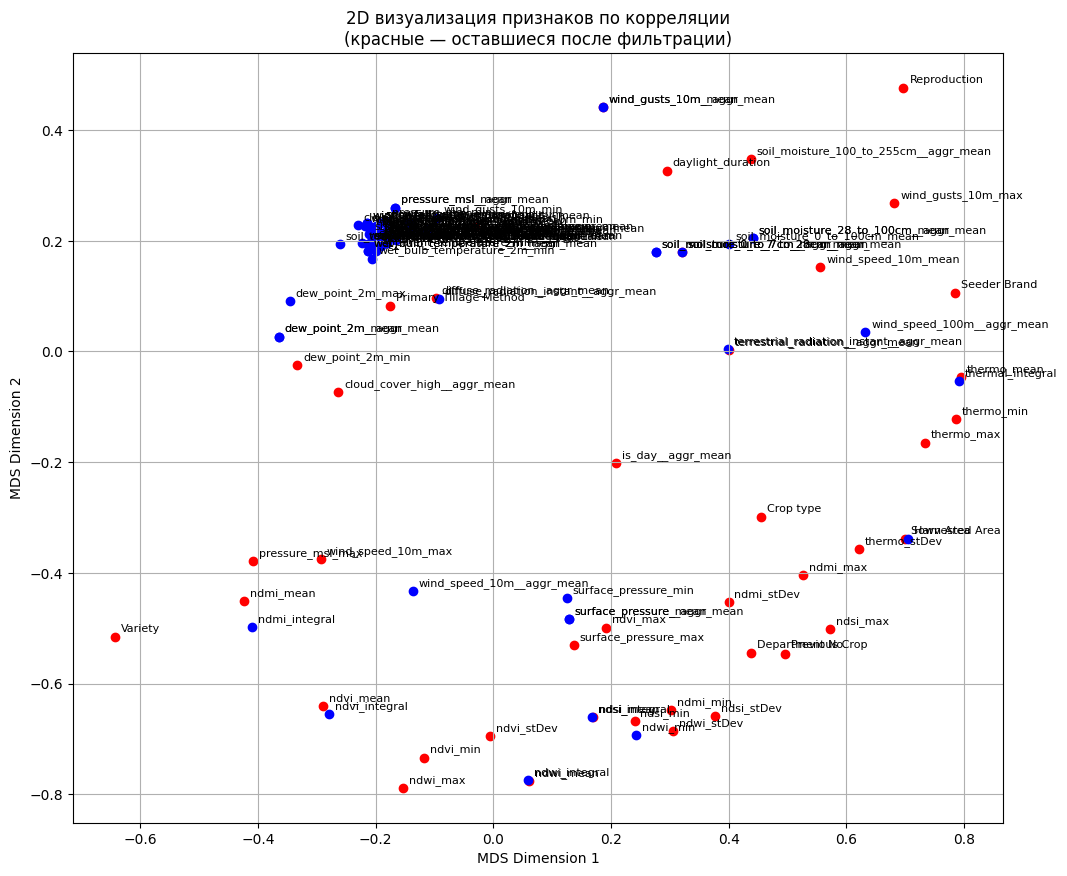

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# 1. Матрица корреляции
corr_matrix = X_with_cat_labels.corr().abs()

# 2. Преобразуем корреляционную матрицу в расстояния
# Чем выше корреляция -> тем ближе
distance_matrix = 1 - corr_matrix

# 3. Применим MDS для проекции в 2D
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
X_2D = mds.fit_transform(distance_matrix)

# 4. Получим имена оставшихся признаков


remaining_features = remove_correlated_features(X_with_cat_labels, 0.9).columns

# 5. Построим scatter plot
plt.figure(figsize=(12, 10))

for i, col in enumerate(corr_matrix.columns):
    color = 'red' if col in remaining_features else 'blue'
    plt.scatter(X_2D[i, 0], X_2D[i, 1], color=color)
    plt.text(X_2D[i, 0] + 0.01, X_2D[i, 1] + 0.01, col, fontsize=8)

plt.title('2D визуализация признаков по корреляции\n(красные — оставшиеся после фильтрации)')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

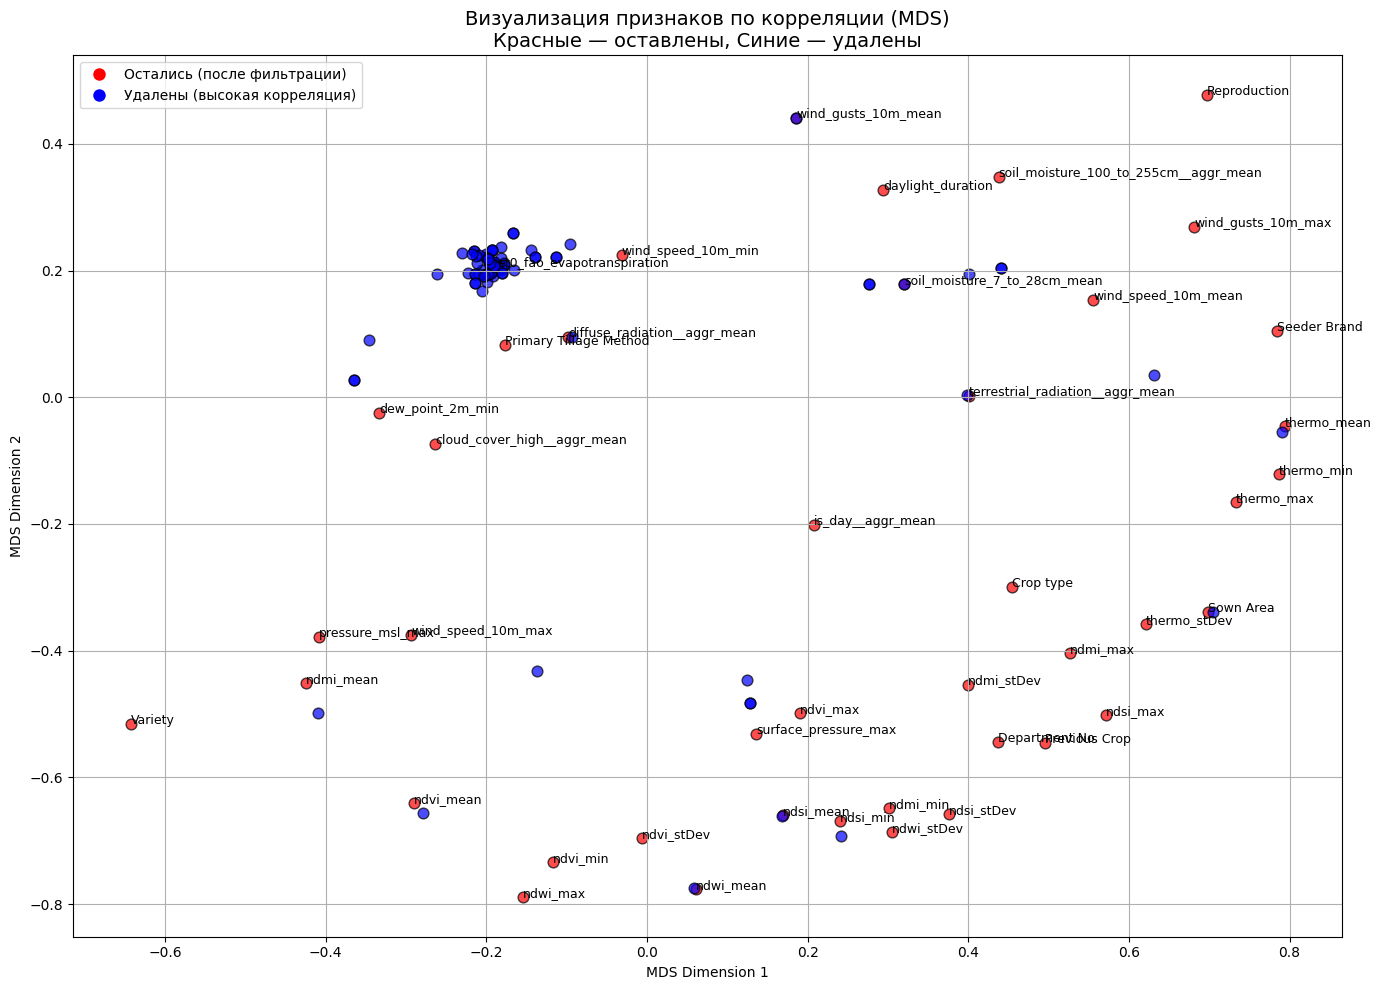

In [145]:
import matplotlib.pyplot as plt
#from adjustText import adjust_text

# Построение
plt.figure(figsize=(14, 10))
texts = []

for i, col in enumerate(corr_matrix.columns):
    x, y = X_2D[i, 0], X_2D[i, 1]
    is_remaining = col in remaining_features
    color = 'red' if is_remaining else 'blue'
    label = col if is_remaining else None  # Подписываем только оставшиеся
    plt.scatter(x, y, color=color, s=60, alpha=0.7, edgecolor='k', label='Остался' if is_remaining else 'Удалён')
    if label:
        texts.append(plt.text(x, y, label, fontsize=9))

# Автоматически распихиваем подписи, чтобы не накладывались
#adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

# Добавим легенду
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Остались (после фильтрации)', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Удалены (высокая корреляция)', markerfacecolor='blue', markersize=10)
]
plt.legend(handles=handles, loc='best')

plt.title('Визуализация признаков по корреляции (MDS)\nКрасные — оставлены, Синие — удалены', fontsize=14)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.tight_layout()
plt.savefig(f"img/mds_map.jpg",
            #bbox_inches='tight', 
            dpi=1500)
plt.show()


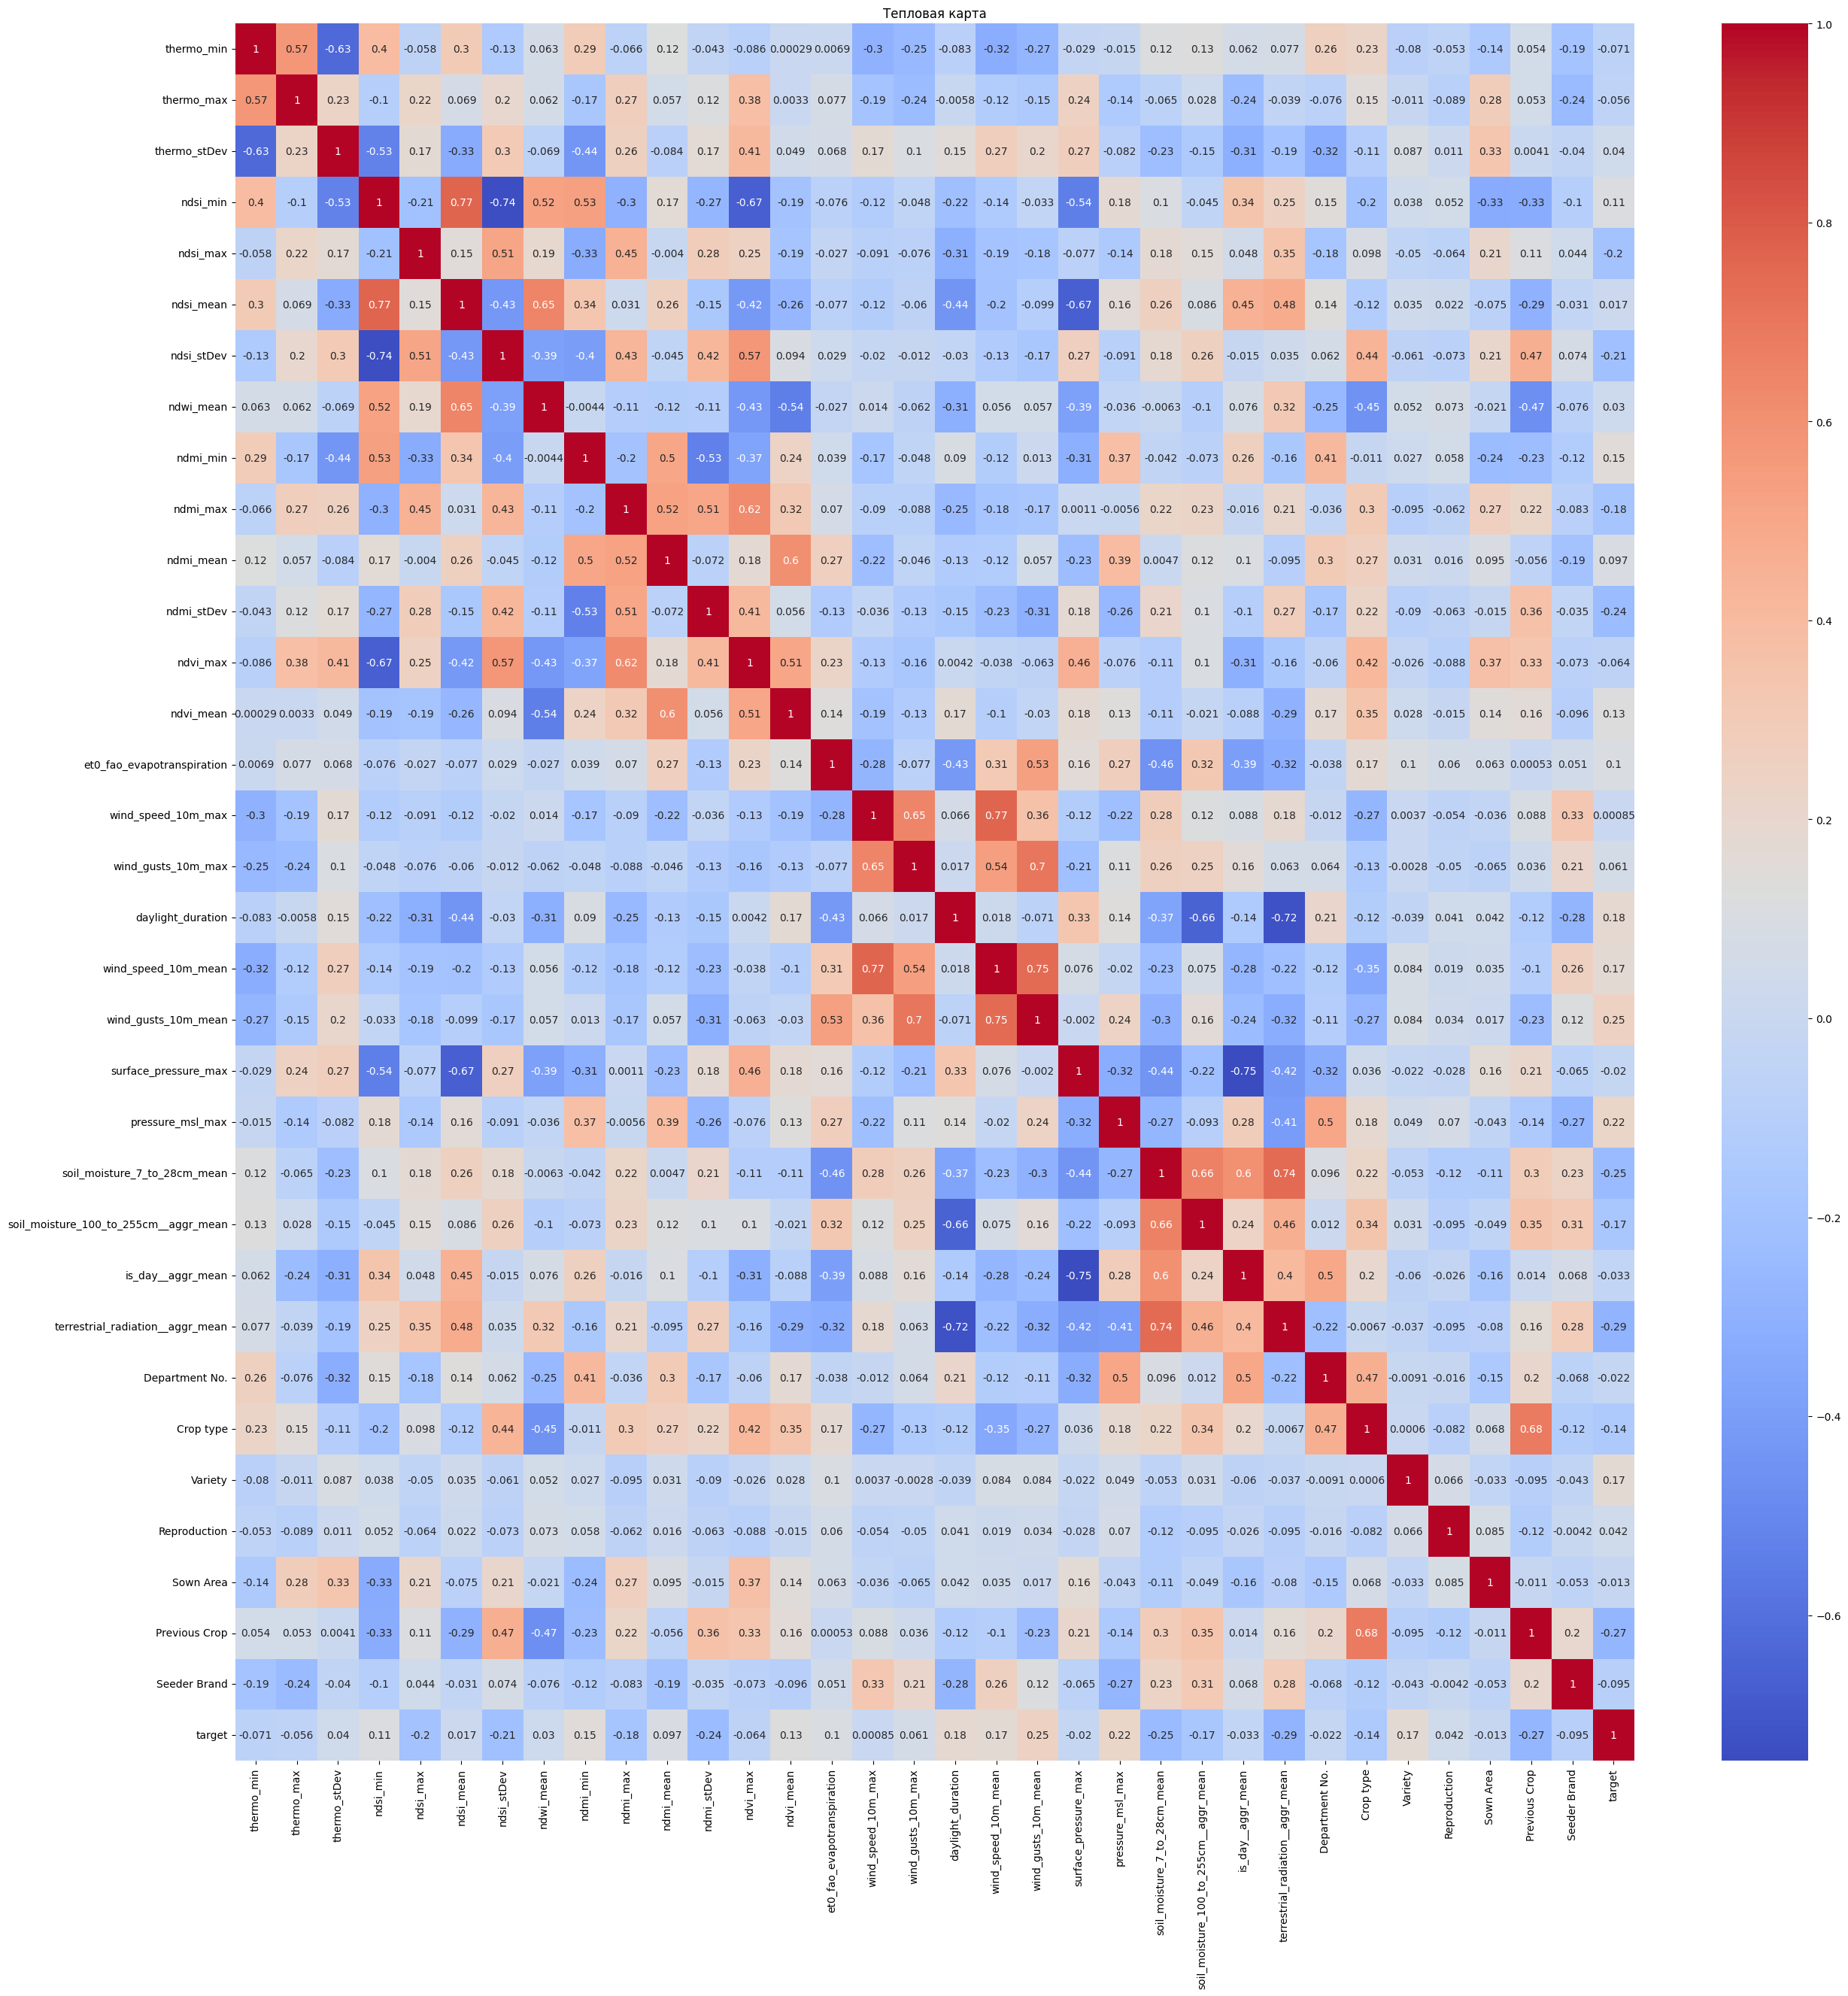

In [146]:
import seaborn as sns

plt.figure(figsize=(30, 30))
X_without_corr_y = X_without_corr.copy()
X_without_corr_y['target'] = y_target
sns.heatmap(X_without_corr_y.corr(), annot=True, cmap='coolwarm')

plt.title("Тепловая карта")
#plt.show()
output_dir = "img/heatmap_img"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f"img/heatmap_img/heatmap.jpg",
            #bbox_inches='tight', 
            dpi=1500)
plt.savefig(f"img/heatmap_img/heatmap.svg",
            #bbox_inches='tight',
            )
plt.show()
#plt.close()

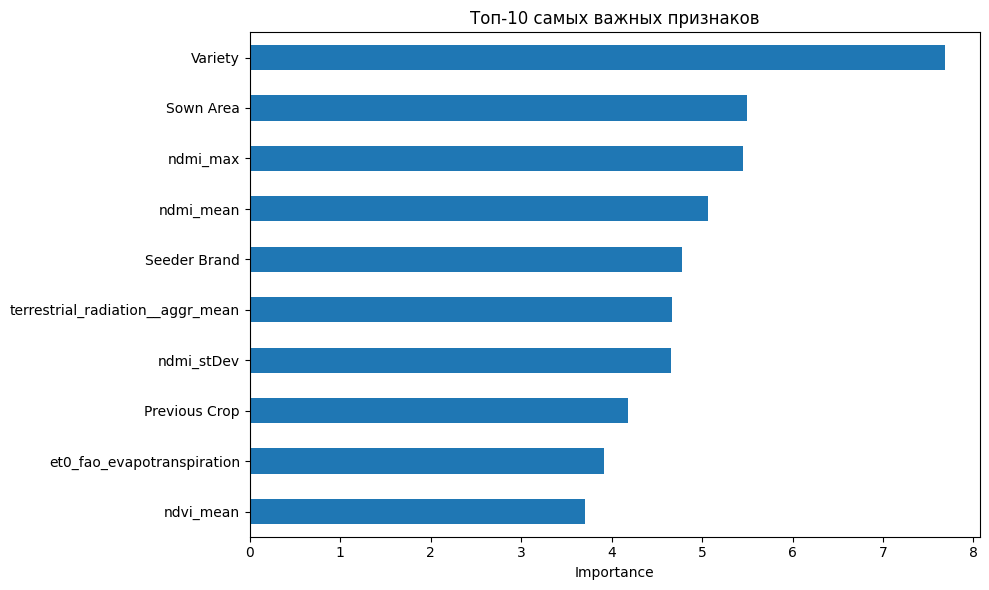

In [147]:
from catboost import CatBoostClassifier, Pool

X_for_feat = X_without_corr.copy()
#X_for_feat = X_for_feat.drop(['Harvested Area', 'Sown Area'], axis=1)

# Обучаем модель
model = CatBoostRegressor(verbose=0, random_state=42)
model.fit(X_for_feat, y_target.to_numpy().copy())

# Получаем важности
pool = Pool(X_for_feat,y_target.to_numpy().copy())
importances = model.get_feature_importance(pool, type='FeatureImportance')

# Собираем в Series и отбираем топ-10
fi = pd.Series(importances, index=X_for_feat.columns)
top10 = fi.sort_values(ascending=False).head(10)

# Строим график (от самых менее важных в топ-10 к самым важным для удобства чтения)
plt.figure(figsize=(10, 6))
top10.sort_values().plot(kind='barh')
plt.title('Топ-10 самых важных признаков')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

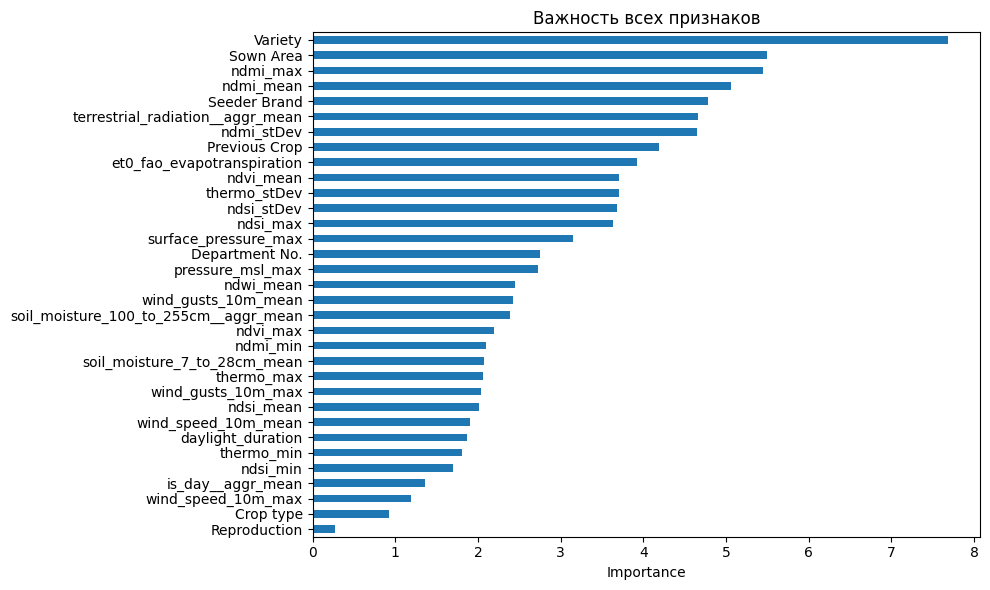

In [148]:
fi = pd.Series(importances, index=X_for_feat.columns)
top10 = fi.sort_values(ascending=False).head(100)

# Строим график (от самых менее важных в топ-10 к самым важным для удобства чтения)
plt.figure(figsize=(10, 6))
top10.sort_values().plot(kind='barh')
plt.title('Важность всех признаков')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

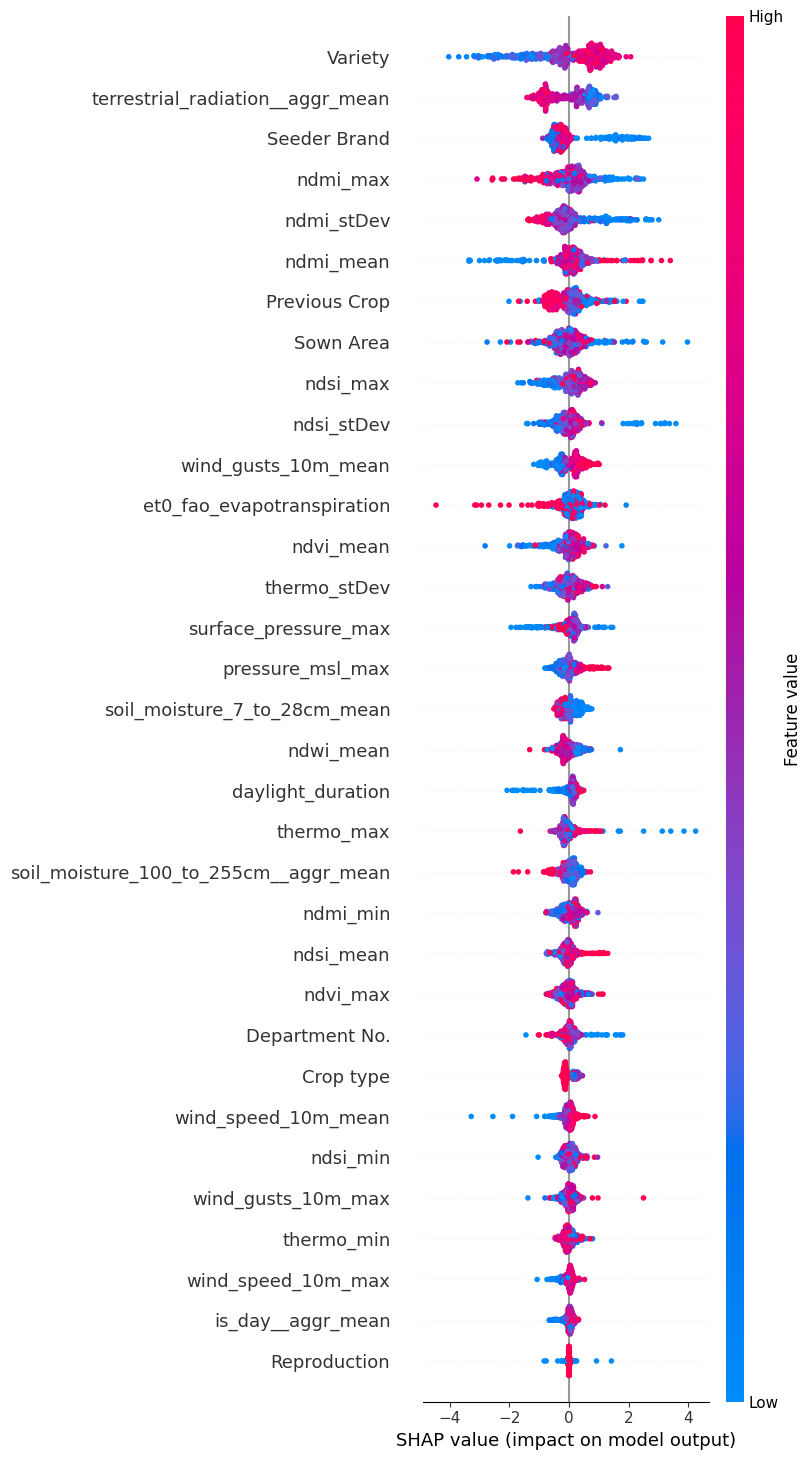

<Figure size 640x480 with 0 Axes>

In [149]:
import shap

explainer = shap.TreeExplainer(model)


shap_values = explainer.shap_values(X_for_feat)

# 6. Визуализация 
shap.summary_plot(shap_values, X_for_feat, show=True, max_display=X_for_feat.shape[1])  # <- отключаем автоотображение
output_dir = "img/shap_img"
os.makedirs(output_dir, exist_ok=True)  # Создаёт все поддиректории, если их нет
plt.savefig(f"{output_dir}/shap_img_1.png", bbox_inches='tight', dpi=300)

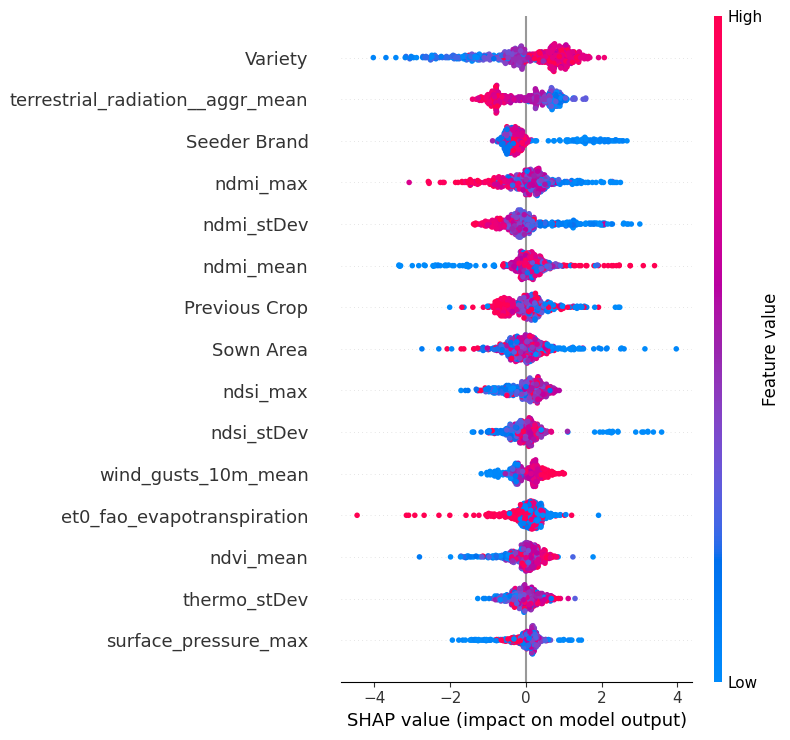

<Figure size 640x480 with 0 Axes>

In [150]:
import shap

explainer = shap.TreeExplainer(model)


shap_values = explainer.shap_values(X_for_feat)

# 6. Визуализация 
shap.summary_plot(shap_values, X_for_feat, show=True, max_display=15)
output_dir = "img/shap_img"
os.makedirs(output_dir, exist_ok=True)  # Создаёт все поддиректории, если их нет
plt.savefig(f"{output_dir}/shap_img_2.png", bbox_inches='tight', dpi=300)

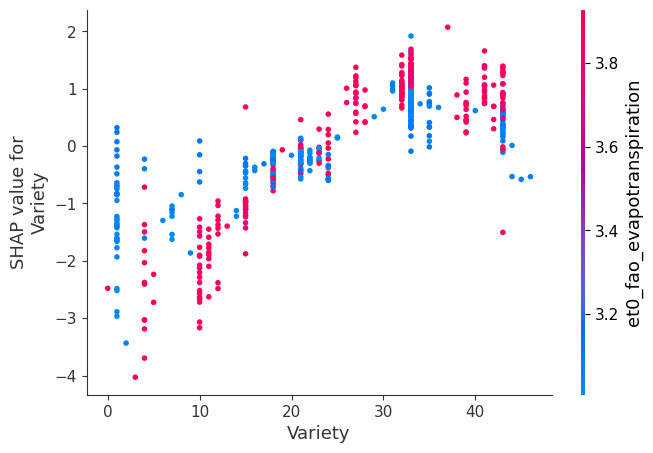

In [151]:
shap.dependence_plot('Variety', shap_values, X_for_feat, show=True)

In [152]:
X_for_feat.iloc[0:0 + 1]

,thermo_min,thermo_max,thermo_stDev,ndsi_min,ndsi_max,ndsi_mean,ndsi_stDev,ndwi_mean,ndmi_min,ndmi_max,...,soil_moisture_100_to_255cm__aggr_mean,is_day__aggr_mean,terrestrial_radiation__aggr_mean,Department No.,Crop type,Variety,Reproduction,Sown Area,Previous Crop,Seeder Brand
0,-5.326639,3.80592,1.646105,-0.285538,0.068926,-0.102679,0.042749,-0.239069,-0.012095,0.301168,...,0.33283,0.545991,349.607811,1,0,33,2,102.0,17,14


In [153]:
X.iloc[0:0 + 1]['thermo_min']

0   -5.326639
Name: thermo_min, dtype: float64

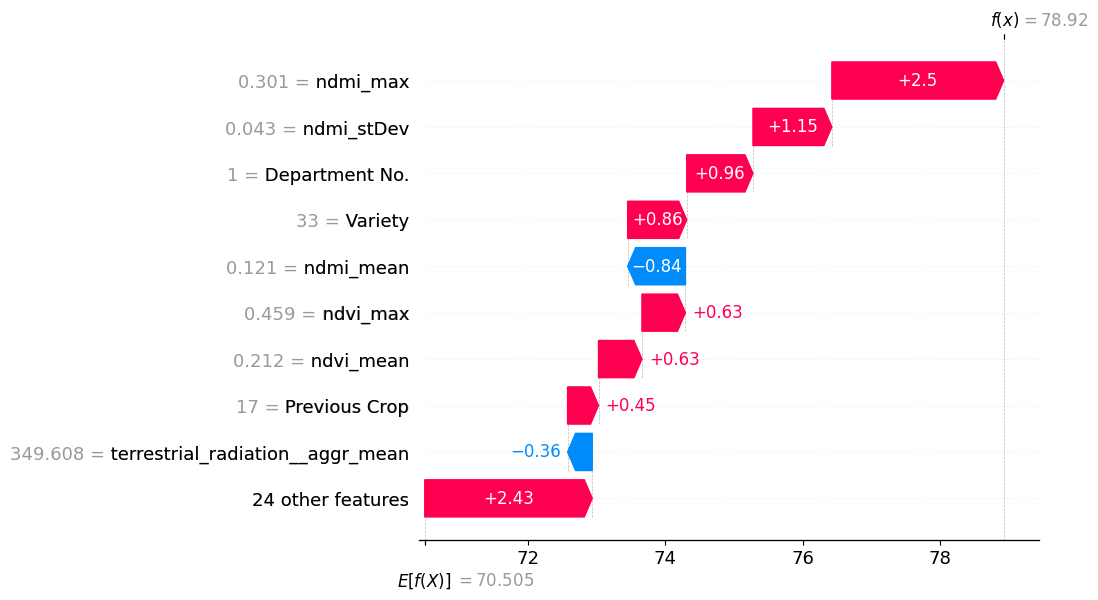

In [154]:
shap_explanation = explainer(X_for_feat.iloc[0:0 + 1])
fig = plt.figure(figsize=(12, 8 ))  # задаём подходящий размер
# Строим waterfall plot
shap.plots.waterfall(shap_explanation[0], show = True)

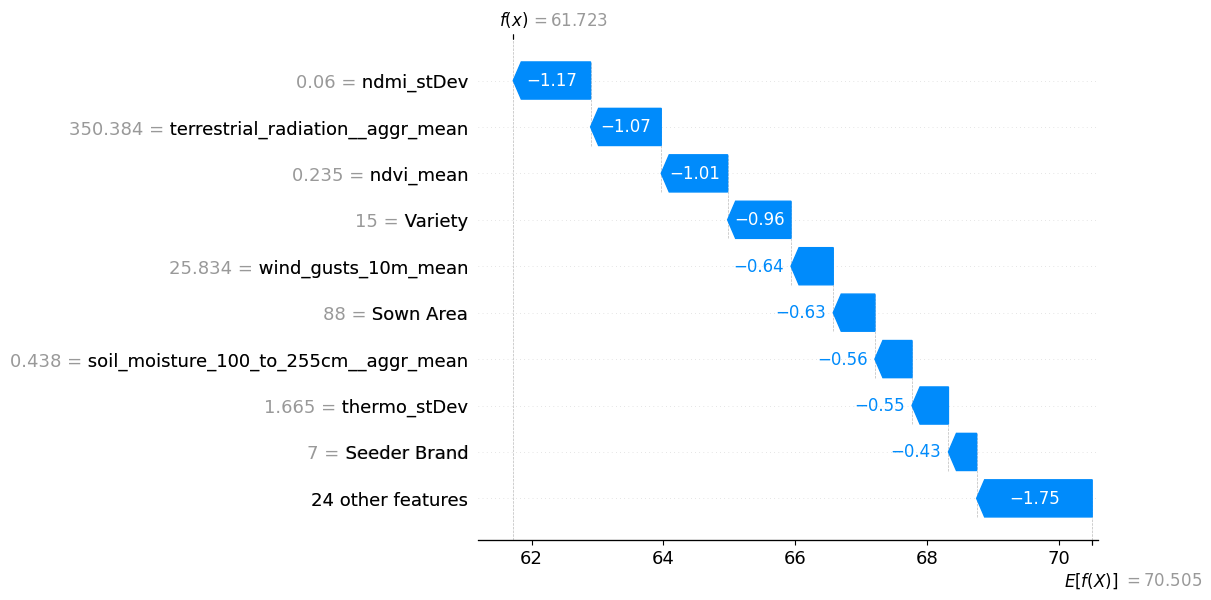

In [155]:
shap_explanation = explainer(X_for_feat.iloc[100:100 + 1])
fig = plt.figure(figsize=(12, 8 ))  # задаём подходящий размер
# Строим waterfall plot
shap.plots.waterfall(shap_explanation[0], show = True)

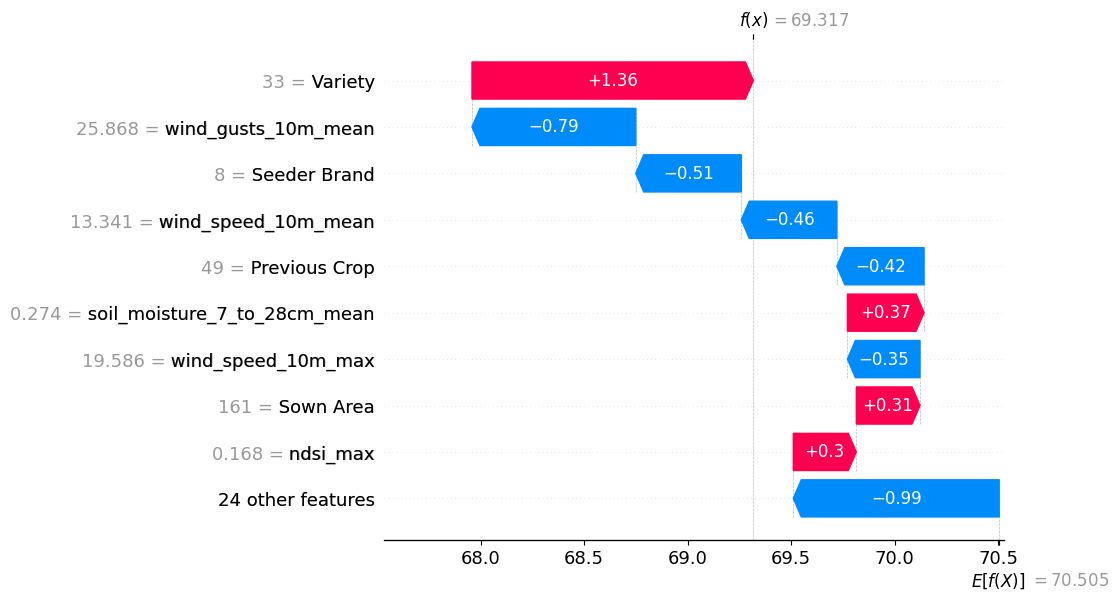

In [156]:
shap_explanation = explainer(X_for_feat.iloc[500:500 + 1])
fig = plt.figure(figsize=(12, 8 ))  # задаём подходящий размер
# Строим waterfall plot
shap.plots.waterfall(shap_explanation[0], show = True)

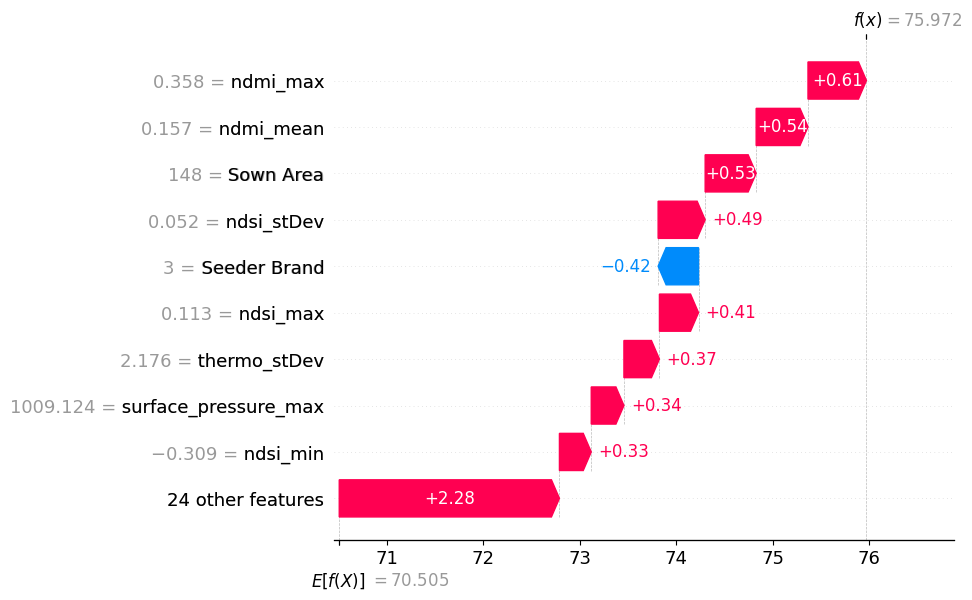

In [157]:
shap_explanation = explainer(X_for_feat.iloc[250:250 + 1])
fig = plt.figure(figsize=(12, 8 ))  # задаём подходящий размер
# Строим waterfall plot
shap.plots.waterfall(shap_explanation[0], show = True)